In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
time_on_Education = df['Time_on_Education']

print(time_on_Education)

0       1.2
1       1.8
2       0.4
3       0.8
4       1.1
       ... 
2995    1.0
2996    0.3
2997    2.4
2998    1.5
2999    0.1
Name: Time_on_Education, Length: 3000, dtype: float64


In [26]:
sorted_unique_values = sorted(time_on_Education.unique())
print(sorted_unique_values)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


In [27]:
initial_count = len(df)
time_on_Education_filtered = time_on_Education[time_on_Education > 0]

removed_count = initial_count - len(time_on_Education_filtered)
proportion_removed = removed_count / initial_count * 100

print(f"Количество удаленных строк: {removed_count}")
print(f"Доля удаленных строк от общего количества: {proportion_removed:.2f}%")
time_on_Education_filtered

Количество удаленных строк: 250
Доля удаленных строк от общего количества: 8.33%


0       1.2
1       1.8
2       0.4
3       0.8
4       1.1
       ... 
2995    1.0
2996    0.3
2997    2.4
2998    1.5
2999    0.1
Name: Time_on_Education, Length: 2750, dtype: float64

In [28]:
mean = time_on_Education_filtered.mean()
variance = time_on_Education_filtered.var()
mode = time_on_Education_filtered.mode()[0]  # Мода может иметь несколько значений, берем первое
median = time_on_Education_filtered.median()
quantiles = time_on_Education_filtered.quantile([0.25, 0.5, 0.75])
kurtosis = stats.kurtosis(time_on_Education_filtered)
skewness = stats.skew(time_on_Education_filtered)
iqr = stats.iqr(time_on_Education_filtered)

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили (0.25, 0.5, 0.75): {quantiles}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: 1.1087272727272728
Дисперсия: 0.3560969608783364
Мода: 0.8
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): 0.25    0.7
0.50    1.0
0.75    1.5
Name: Time_on_Education, dtype: float64
Эксцесс: -0.24041976594456305
Ассиметрия: 0.4568267436944265
Интерквартильный размах: 0.8


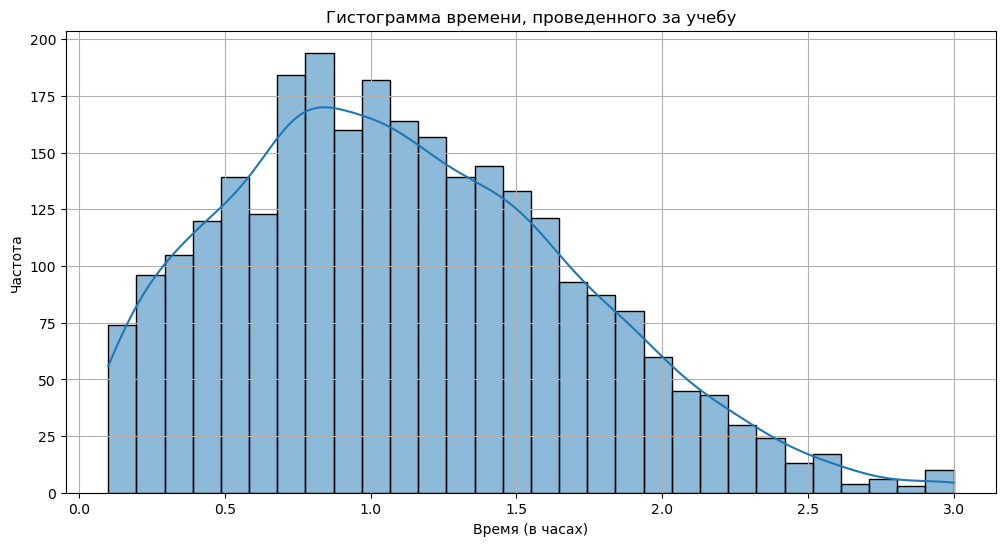

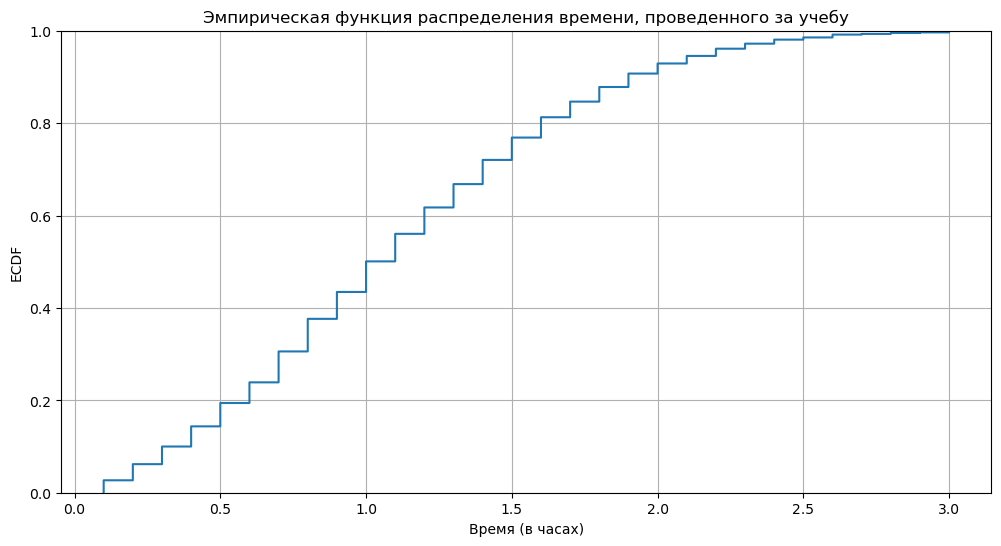

In [29]:

plt.figure(figsize=(12, 6))
unique_bins = time_on_Education_filtered.nunique()  # Количество уникальных значений
#unique_bins = int(1 + np.log2(time_on_Education_filtered.nunique()))  # Количество столбцов

sns.histplot(time_on_Education_filtered, bins=unique_bins, kde=True)
plt.title('Гистограмма времени, проведенного за учебу')
plt.xlabel('Время (в часах)')
plt.ylabel('Частота')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.ecdfplot(time_on_Education_filtered)
plt.title('Эмпирическая функция распределения времени, проведенного за учебу')
plt.xlabel('Время (в часах)')
plt.ylabel('ECDF')
plt.grid()
plt.show()

Статистика хи-квадрат: 83.68478241010669
Критическое значение: 14.067140449340169
Наблюдаемые частоты: [275 382 538 503 416 301 185  97  34  19]
Ожидаемые частоты: [188.99087967 335.58029344 472.63805452 528.02398093 467.9253608
 328.9211284  183.39295878  81.10026747  28.44290695   7.91028681]
Результат теста: Отвергаем гипотезу о нормальности
Ассиметрия: 0.4570760957129542
Эксцесс: -0.23867246994550984


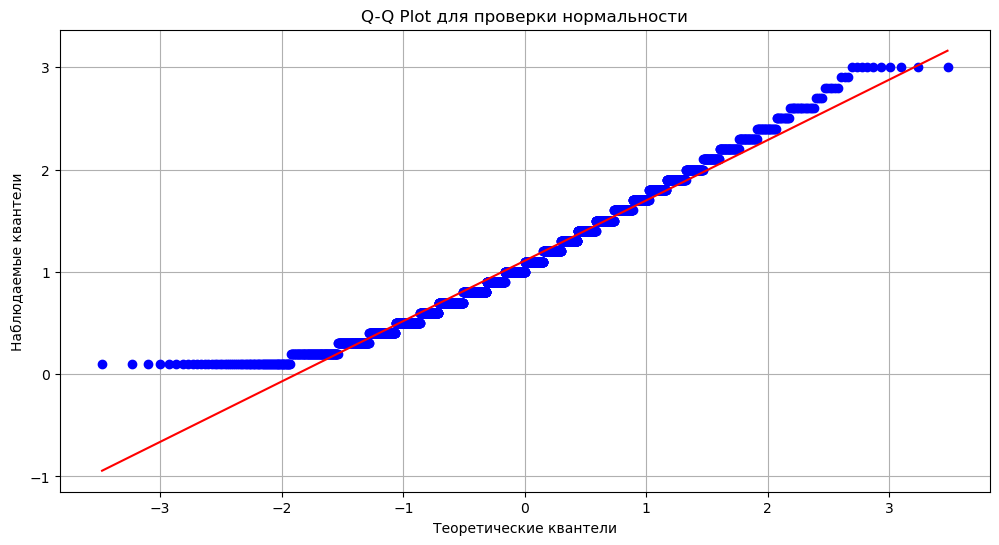

In [30]:
def chi_square_test(data, num_bins=10, alpha=0.05):
    observed_freq, bins = np.histogram(data, bins=num_bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    expected_freq = np.array([len(data) * (stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)) for i in range(len(bins)-1)])
    
    chi_square_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    
    df = num_bins - 1 - 2  # 2 для оценки параметров (среднее и стандартное отклонение)
    
    critical_value = stats.chi2.ppf(1 - alpha, df)
    
    if chi_square_stat > critical_value:
        result = "Отвергаем гипотезу о нормальности"
    else:
        result = "Не отвергаем гипотезу о нормальности"
    
    return chi_square_stat, critical_value, observed_freq, expected_freq, result

chi_square_stat, critical_value, observed_freq, expected_freq, result = chi_square_test(time_on_Education_filtered)

print(f"Статистика хи-квадрат: {chi_square_stat}")
print(f"Критическое значение: {critical_value}")
print(f"Наблюдаемые частоты: {observed_freq}")
print(f"Ожидаемые частоты: {expected_freq}")
print(f"Результат теста: {result}")

skewness = (time_on_Education_filtered - np.mean(time_on_Education_filtered)).skew()
kurtosis = (time_on_Education_filtered - np.mean(time_on_Education_filtered)).kurtosis()

print(f"Ассиметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")

plt.figure(figsize=(12, 6))
stats.probplot(time_on_Education_filtered, dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности')
plt.xlabel('Теоретические квантели')
plt.ylabel('Наблюдаемые квантели')
plt.grid()
plt.show()

In [31]:
time_on_Education_transformed = (time_on_Education_filtered - time_on_Education_filtered.min()) / (time_on_Education_filtered.max() - time_on_Education_filtered.min())

In [32]:
time_on_Education_transformed


0       0.379310
1       0.586207
2       0.103448
3       0.241379
4       0.344828
          ...   
2995    0.310345
2996    0.068966
2997    0.793103
2998    0.482759
2999    0.000000
Name: Time_on_Education, Length: 2750, dtype: float64

In [33]:
mean = time_on_Education_transformed.mean()
variance = time_on_Education_transformed.var()
mode = time_on_Education_transformed.mode()[0]  # Мода может иметь несколько значений, берем первое
median = time_on_Education_transformed.median()
quantiles = time_on_Education_transformed.quantile([0.25, 0.5, 0.75])
kurtosis = stats.kurtosis(time_on_Education_transformed)
skewness = stats.skew(time_on_Education_transformed)
iqr = stats.iqr(time_on_Education_transformed)

# Вывод характеристик
print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили (0.25, 0.5, 0.75): {quantiles}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: 0.34783699059561135
Дисперсия: 0.042342088094927476
Мода: 0.24137931034482762
Медиана: 0.3103448275862069
Квантили (0.25, 0.5, 0.75): 0.25    0.206897
0.50    0.310345
0.75    0.482759
Name: Time_on_Education, dtype: float64
Эксцесс: -0.2404197659445626
Ассиметрия: 0.45682674369442566
Интерквартильный размах: 0.27586206896551724


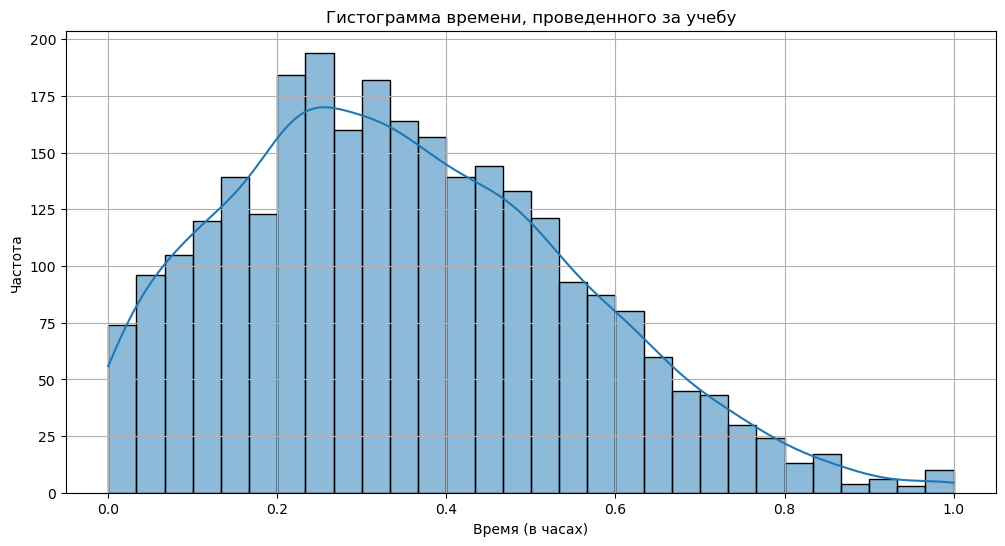

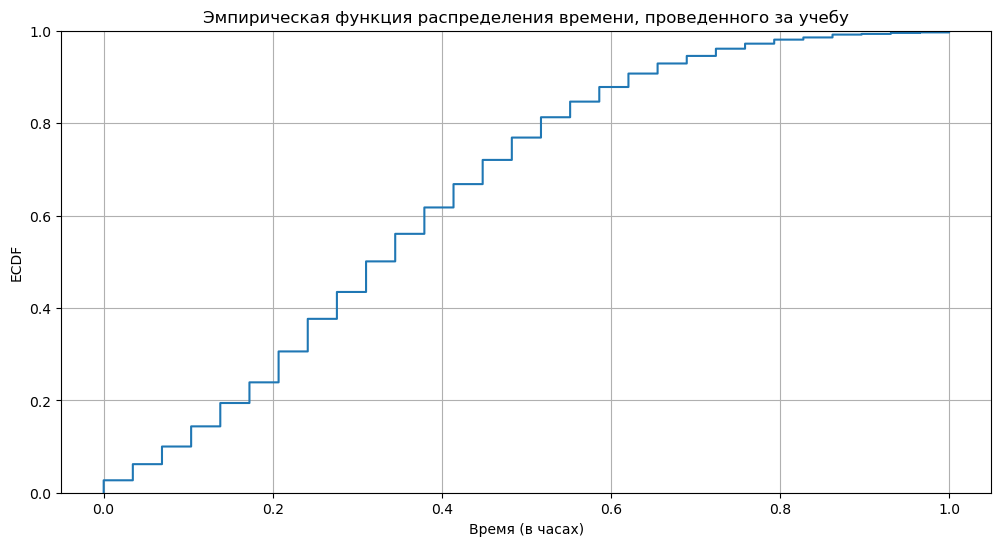

In [34]:
# Гистограмма
plt.figure(figsize=(12, 6))
unique_bins = time_on_Education_transformed.nunique()  # Количество уникальных значений
#unique_bins = int(1 + np.log2(time_on_Education_transformed.nunique()))  # Количество столбцов

sns.histplot(time_on_Education_transformed, bins=unique_bins, kde=True)
plt.title('Гистограмма времени, проведенного за учебу')
plt.xlabel('Время (в часах)')
plt.ylabel('Частота')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.ecdfplot(time_on_Education_transformed)
plt.title('Эмпирическая функция распределения времени, проведенного за учебу')
plt.xlabel('Время (в часах)')
plt.ylabel('ECDF')
plt.grid()
plt.show()

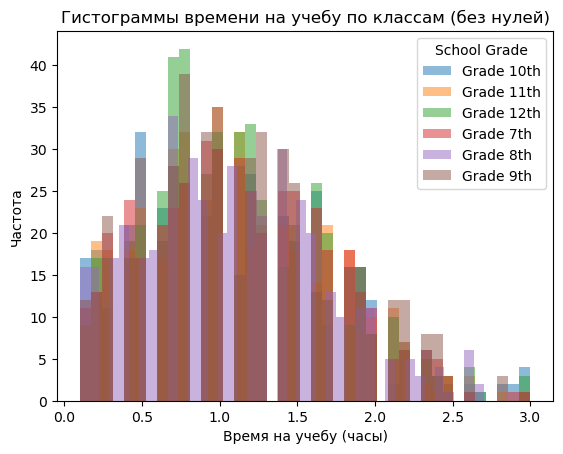

                  Mean  Variance
School_Grade                    
10th          1.105740  0.396914
11th          1.091954  0.341663
12th          1.105510  0.341953
7th           1.125499  0.343637
8th           1.088194  0.349907
9th           1.132311  0.364446


In [11]:
df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
df_filtered = df[df['Time_on_Education'] > 0]

time_on_Education = df_filtered['Time_on_Education']

grouped = df_filtered.groupby('School_Grade')['Time_on_Education']

mean_values = grouped.mean()
variance_values = grouped.var()
stats = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values
})

unique_times = df_filtered['Time_on_Gaming'].unique()

for name, group in grouped:
    plt.hist(group, bins=len(unique_times), alpha=0.5, label=f'Grade {name}')

plt.title('Гистограммы времени на учебу по классам (без нулей)')
plt.xlabel('Время на учебу (часы)')
plt.ylabel('Частота')
plt.legend(title='School Grade')
plt.show()

print(stats)